# Emergency Calls Data Analysis

## Introduction
This dataset conatins 911 Emergency calls in Montgomery County Pennsylvania.

Information about the columns
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Data Source - Kaggle

In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
sns.set_style('darkgrid')

In [3]:
#read the csv file into a pandas dataframe as df
calls = pd.read_csv('911.csv')

In [4]:
#check the head (first 5 rows) of the dataframe
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Data Cleaning

Observing the 'title' column, there are words, before what seems to be the main title. Those words looks like umbrella to explain the departments that callled 911. Hence, we will split the title column into 'reason' and 'title'.

For instance, if the title column value is EMS: DIABETIC EMERGENCY, the Reason column value would be EMS

**Split title column to 'title' and reason'**

In [8]:
calls['Reason'] = calls['title'].apply(lambda title: title.split(':')[0])

**Convert the timeStamp to Datetime object using the pandas pd.to_datetime**

In [9]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

**With the timestamp column now Datetime object, we can use .apply() to create 3 new columns called Hour, Month and Day of week based off of the timeStamp column**

In [11]:
calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)
calls['Day of Week'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

**The 'Day of week' column has integers 0-6 which would actually stand for the 7days of the week. We can create a dictionary and use the .map() function to rename the integers to the normal names**

In [12]:
#create a dictionary
dic = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}

In [13]:
#use the .map() to rename the column with the dictionary created
calls['Day of Week'] = calls['Day of Week'].map(dic)

### Exploratory Data Analysis

**Highest Reason for 911 Calls**

In [20]:
calls['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

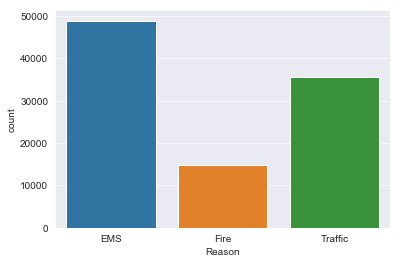

In [28]:
sns.countplot(x=calls['Reason'], data=calls)

**Rate of the calls per each day of the week**

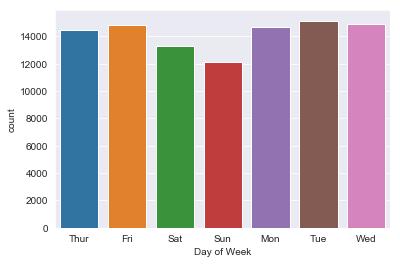

In [29]:
sns.countplot(x='Day of Week', data=calls);

**Which reason is more prominent in each days calls were made?**

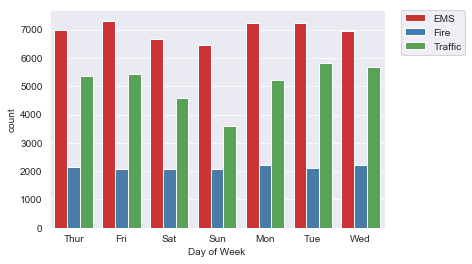

In [30]:
sns.countplot(x='Day of Week', data=calls, hue='Reason', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**We can do the same for the month**


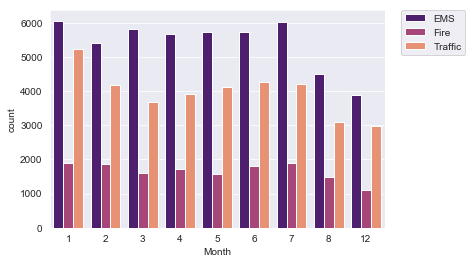

In [31]:
sns.countplot(x='Month', data=calls, hue='Reason', palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Something to note in the plot above is that, the month 9, 10 and 11 are missing. Let's look for a way to fix that.**

**We will create a line plot that takes the missing months into account maybe we can fill the missing data points**

**First, create a groupby object called bymonth where you group the DataFrame by the month column and use the count() method for aggregation**

In [24]:
byMonth = calls.groupby('Month').count()

In [25]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**we can create a simple line plot to visualize the dataframe indicating the count of calls per month**

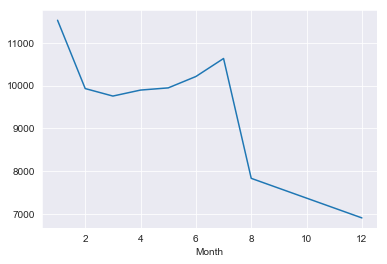

In [54]:
#Could be any column
byMonth['zip'].plot()

**The line plot above make it sort of clearer than the bar plot to visualize the missing months**

**Top 5 towns that called**

In [33]:
top_5_town = calls['twp'].value_counts().head(5)

print('top_5_town: ', top_5_town)

top_5_town:  LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


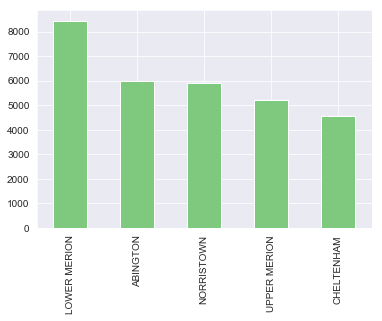

In [69]:
top_5_town.plot(kind='bar', colormap='Accent');

### Conclusions
From the analysis above, the following insights were drawn:
* Most 911 calls were due to Health condition
* Days of the week did not influence emergency calls placed
* Lower Merion township placed more emergency calls